In [1]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [2]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1",names=["target", "ids", "date", "flag", "user", "text"])
#TEMPORARY EDIT TO CHANGE DATA SAMPLE SIZE
################################################################

df = df.dropna()
del df["flag"]
del df["user"]
del df["date"]
if (len(df["target"].unique()) == 1):
    del df["target"]
else:
    print(df["target"].unique())
df.head()

df = df.replace(4, 1)




#We have train and test, now we need to...
# Today's goal: Get a model, train it, test it
df.head()

[0 4]


,target,ids,text
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."


In [4]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)


In [5]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess


In [6]:
from nltk.stem import PorterStemmer
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english') and word[0] != '@']
    return clean_mess


In [7]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))

['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']


In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


In [9]:
df = df.sample(frac = 0.5)

In [ ]:
# Creates clean csv
cleandata = []
for sentence in df["text"].tolist():
    listofwords = no_user_alpha(sentence)
    cleandata.append(" ".join(listofwords))

df["new_data"] = cleandata
df.head()
    
    
df.to_csv('temporary.csv')      


In [10]:
train_tweets = df.sample(frac = 0.8)
test_tweets = df.drop(train_tweets.index)


print(df['text'].size)




800000


In [11]:
df = df.sample(frac = 0.5)

In [12]:
msg_train, msg_test, label_train, label_test = train_test_split(df['text'], df['target'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78     44813
           1       0.71      0.80      0.75     35187

    accuracy                           0.77     80000
   macro avg       0.77      0.77      0.77     80000
weighted avg       0.77      0.77      0.77     80000

[[33099 11714]
 [ 6963 28224]]
0.7665375


In [13]:
print("Training Size {}, Test Size {}".format(label_train.size,label_test.size))


Training Size 320000, Test Size 80000


In [ ]:
import tkinter as tk  
from tkinter import ttk
import time

running = True
win = tk.Tk()# Application Name  
win.title("Python GUI App")# Label  
lbl = ttk.Label(win, text = "Enter the name:").grid(column = 0, row = 0)# Click event 
def outputanalysis():
    text = [name.get()]
    print(pipeline.predict_proba(text))
    if running:
        print(name.get())
    win.after(1000,outputanalysis)
    output = ttk.Label(win, text = "Output the number: {}".format(pipeline.predict([name.get()]))).grid(column = 1, row = 2)# Click event
    final = ttk.Label(win, text = pipeline.predict_proba(text)).grid(column = 1, row = 3)# Click event 
def stop():
    global running
    running = False
def start():
    global running
    outputanalysis()
    running = True
def click():   
    print("Hi," + name.get())# Textbox widget  
name = tk.StringVar()  
nameEntered = ttk.Entry(win, width = 12, textvariable = name).grid(column = 0, row = 1)# Button widget  
button = ttk.Button(win, text = "submit", command = click).grid(column = 1, row = 1)
start = ttk.Button(win, text = "Start Analysis", command=start)
stop = ttk.Button(win, text = "Stop Analysis", command=stop)
final = ttk.Label(win, text = "Show Log Statistics").grid(column = 1, row = 2)


#output = ttk.Label(win, text = "Output the number: {}".format(pipeline.predict([name.get()]))).grid(column = 1, row = 2)# Click event 




#start.grid()
#stop.grid()


outputanalysis()

win.mainloop()



text = ["Donald Trump amazing"]
print(text)
print(pipeline.predict(text))


[[0.4996125 0.5003875]]



invalid command name "140560258135104outputanalysis"
    while executing
"140560258135104outputanalysis"
    ("after" script)
invalid command name "140560807185472outputanalysis"
    while executing
"140560807185472outputanalysis"
    ("after" script)
invalid command name "140560807186176outputanalysis"
    while executing
"140560807186176outputanalysis"
    ("after" script)


[[0.4996125 0.5003875]]

Hi,fdsa
[[0.4996125 0.5003875]]
fdsa
[[0.4996125 0.5003875]]
fdsa
[[0.95273752 0.04726248]]
sad
[[0.95273752 0.04726248]]
sad
[[0.95273752 0.04726248]]
sad
[[0.95273752 0.04726248]]
sad
[[0.95273752 0.04726248]]
sad
[[0.95273752 0.04726248]]
sad
[[0.95273752 0.04726248]]
sad
[[0.95273752 0.04726248]]
sad
[[0.4996125 0.5003875]]

[[0.59011415 0.40988585]]
Elon
[[0.4996125 0.5003875]]

[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.95273752 0.04726248]]
Sad
[[0.4996125 0.5003875]]
L
[[0.59011415 0.40988585]]
Elon M
[[0.59011415 0.40988585]]
Elon Musk
[[0.59011415 0.40988585]]
Elon Musk
[[0.59011415 0.40988585]]
Elon Musk
[[0.59011415 0.40988585]]
Elon 

790708                  @RWildThing Something you've eaten? 
825195     @jonthanjay I have an Itunes gift card 4 u but...
996718                                    good morning Josh 
636810     finally got unpacked, only took me four days! ...
1056649    @DeejayKnight hahaha. awesome. well you look l...
                                 ...                        
1000627    has ï¿½1.40 for school today. That means a Sau...
769438                       I'll miss you all when I leave 
238004                                        Time for work 
1194545    @GeremyFarrell i am.  oh yeah...i know...just ...
120582     i wAnnA gO tO tayLor's feArlesS  conCert  tOo ...
Name: text, Length: 320000, dtype: object


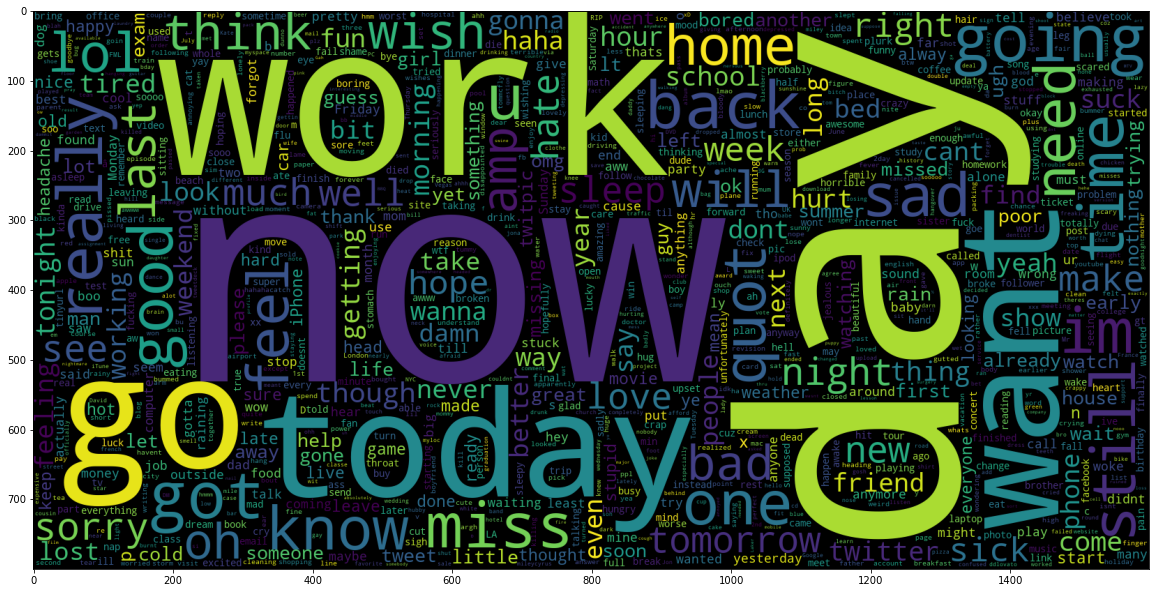

In [35]:
data_pos = df[df['target'] == 1]
data_neg = df[df['target'] == 0]
print(msg_train)
data_neg = data_neg
neg_text = data_neg['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neg_text))
plt.imshow(wc)




In [ ]:
import string
temp = list(string.ascii_uppercase)
print(pipeline.predict(["dope"]))
for i in temp:
    text = [i]
    print(text)
    print(pipeline.predict(text))
    

In [ ]:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [ ]:
train_tweets = train_tweets.sample(frac = 0.1)
test_tweets = train_tweets.drop(train_tweets.index)

train_tweets.size

In [ ]:

train_tweets['parsed_text'] = train_tweets['text'].apply(text_processing)
test_tweets['parsed_text'] = test_tweets['text'].apply(text_processing)

        
    


In [ ]:
X = train_tweets['parsed_text']
y = train_tweets['target']
test = test_tweets['parsed_text']

In [ ]:
train_tweets.head()

In [ ]:
newlist = []
separator = ' '
for sentence in train_tweets["parsed_text"]:
    sent = separator.join(sentence)
    newlist.append(sent)
    

print(len(newlist))
train_tweets['filtered_sentence'] = newlist
print(train_tweets["parsed_text"].size)
train_tweets.head()


In [ ]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['filtered_sentence'], train_tweets['target'], test_size=0.2)

In [ ]:
#Machine Learning Pipeline
from sklearn.feature_extraction.text import CountVectorizer

#Machine Learning Pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

In [ ]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))